# Lập trình song song

## Chủ đề: <mark> SEAM CARVING </mark>

## Thành viên:
- Nguyễn Hiếu Nghia - 21424034
- Đinh Thành Phú - 21424045
- Phạm Thành Phát - 21424043


## I. Mô tả ứng dụng

- **Input**: một tấm ảnh (đồ án này: ảnh RGB)
- **Output**: tấm ảnh được thay đổi kích thước mà không làm biến dạng các
đối tượng quan trọng (đồ án này: tấm ảnh được thu hẹp chiều rộng lại)
- **Ý nghĩa thực tế của ứng dụng**: một use case là ta có thể muốn có các phiên bản với các kích thước khác nhau của cùng một tấm ảnh để hiển thị trên các thiết bị khác nhau (máy tính, điện thoại, …)

## Trước

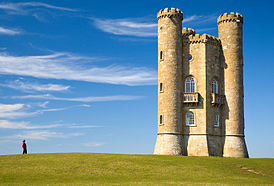

## Sau

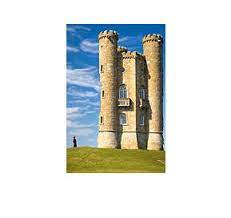

# II/ Ý tưởng thuật toán

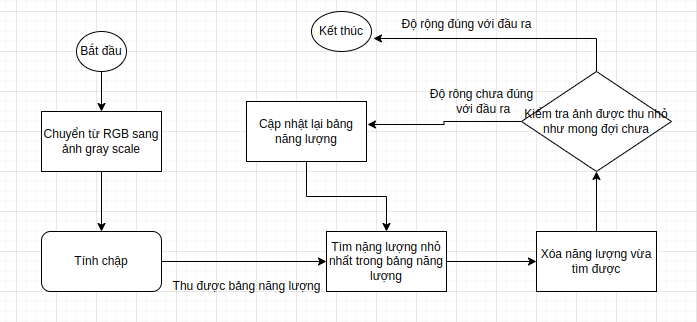

# 1/ Chuyển đổi RGB sang Grayscale

- Công thức: <mark>gray = 0.299 * red + 0.587 * green + 0.114 * blue</mark>
- Trong đó mỗi Pixel đã được lưu dưới dạng _uchar3_ (struct: x, y, z)
- Lý do: Để tính toán tầm quan trọng (năng lượng) của từng Pixel, làm việc trên 1 phần tử sẽ dễ dàng hơn nhiều so với 3 phần tử.

# 2/ Tính chập

x-Sobel

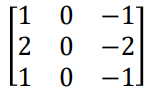

y-Sobel

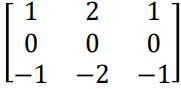

Phát hiện cạnh theo chiều x (1): thực hiện convolution giữa ảnh
grayscale với bộ lọc x-Sobel

Phát hiện cạnh theo chiều y (2): thực hiện convolution giữa ảnh
grayscale với bộ lọc y-Sobel

Từ đó, chúng ta có thể sử dụng __giá trị tuyệt đối__ (hàm _abs_) của (1) và (2) đẻ được độ quan trong của 1 pixel

## Ví dụ: Chuyển đổi giữa ảnh thang độ xám với nhân x-Sobel và y-Sobel

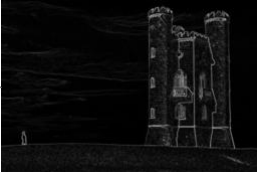

#3/ Tính toán năng lượng của từng pixel sử dụng cường độ gradient

## Tính từ trên xuống

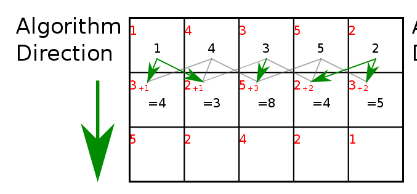

Công thức: M(i,j) = E(i,j) + min(M(i-1,j-1), M(i-1,j), M(i-1,j+1))

Ở đây, E(i,j) đại diện cho năng lượng của pixel (i,j) trong ảnh đầu vào và min(M(i-1,j-1), M(i-1,j), M(i-1,j+1)) đại diện cho giá trị nhỏ nhất của ba phần tử ở hàng trên cùng cột với phần tử M(i,j).

## Tính từ dưới lên

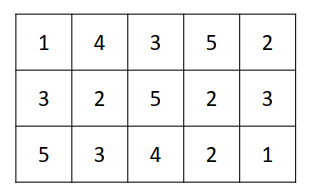

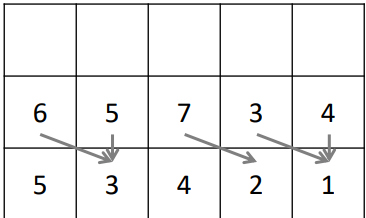

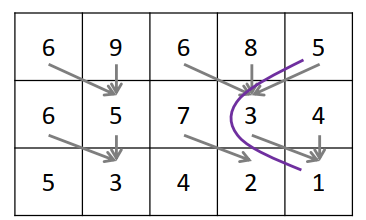

Công thức: M(i,j) = E(i,j) + min(M(i+1,j-1), M(i+1,j), M(i+1,j+1))

## Ý tưởng:
### Từ trên xuống.
 Dòng thứ 1 sẽ giữ nguyên, mà sẽ tính toán từ dòng thứ 2.

 Sẽ lấy 1 trong 3 giá trị nhỏ nhất phía trên.

 Lấy kết quả tìm được cộng với giá trị đang xét.


### Từ dưới lên.
 Dòng cuối sẽ giữ nguyên. mà sẽ tính thừ dòng thứ 2 từ dưới lên.

 Tìm giá trị nhỏ nhất từ 3 giá trị phía dưới.

 Lấy kết quả tìm được cộng với giá trị đang xét.

## Ghi chú:
Trước khi bắt đầu công việc xóa một seam, chúng ta phải tính toán lại toàn bộ ý nghĩa này. Giả sử xóa 100 seam thì tất cả các bảng 100 độ sẽ được tạo.

# 4/ Tìm kiếm nặng lượng nhỏ nhất

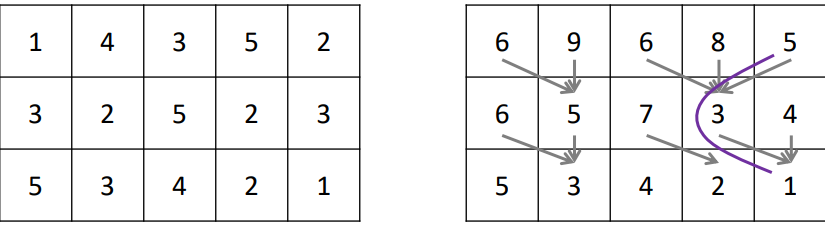

### Giải Thích
 Tìm giá trị nhỏ nhất trong hàng.
 Các hàng tiếp theo sẽ tìm năng lượng (nhánh so với cột xét trước đó) có năng lượng nhất nhất.

# 5/ Xóa năng lượng thấp 

Giải thích: sau khi tìm được năng lượng thấp nhất, thì xóa nó bằng cách dịch các phần tử phải sang trái.

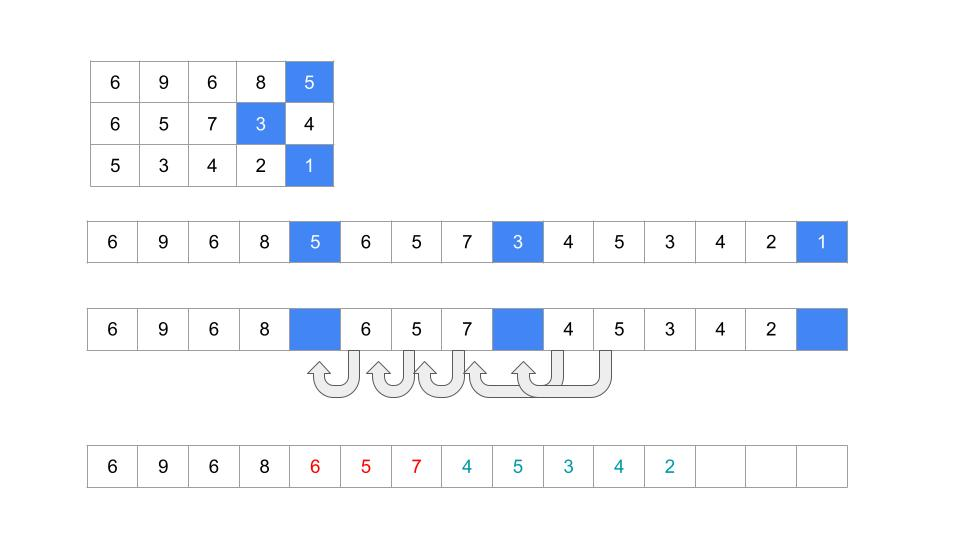

# III/ Các phần cài đặt song song.

 Chuyển ảnh từ RBG sang grayScale: Mỗi thread sẽ xử lý từng Pixel, đọc ghi dữ liệu từ GMEM.

 Tính chập: 

 Tính bảng năng lượng nhỏ nhất: mỗi column là 1 thread.

 Xóa năng lượng: với mỗi block vị trí cần xóa, sẽ dịch chuyển các năng lượng bên phải sang bên trái.

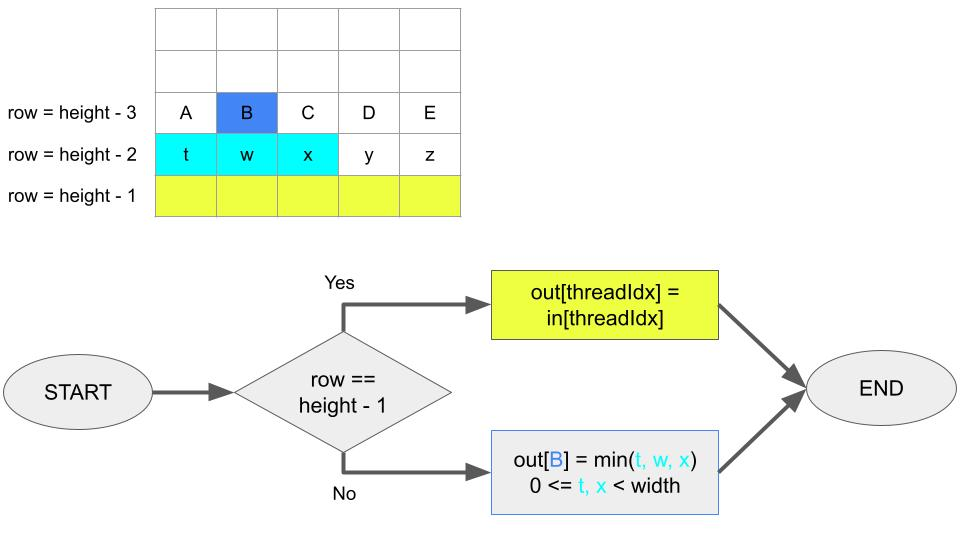

# IV/ phần tối ưu.

1. Cải tiến tìm đường seam từ dưới lên sẽ được 1 bức ảnh tối ưu. 

# V/ Demo

Run Phần code này để có thể hiện ảnh trên notebook

In [1]:
from PIL import Image
import numpy as np
def show_pnm(file_name):
    with open(file_name, 'r') as f:
        vals = f.read().split()
        w = int(vals[1])
        h = int(vals[2])
        if vals[0] == 'P2': # Grayscale
            pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
        elif vals[0] == 'P3': # RGB
            pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
        else:
            return None

    return Image.fromarray(pixels)

## 1. Biên dịch

In [4]:
!nvcc ./main.cu -o ./seamCarving

## đối số đầu vào:
- sau khi biên dịch thành công sẽ tạo ra 1 file seamCarving trong cũng vị trí thư mục với main.cu
- arg[0] file cần chạy (main.cu)
- arg[1] ten file sẽ tạo sau khi biên dịch.

## 2.Chạy file biên dịch

Đối số đầu vào.

- arg[0] tên file sau khi biên dịch.
- arg[1] đường dẫn hình ảnh cần sửa.
- arg[2] tên ảnh kết quả sau khi sửa.
- arg[3] kích thước độ rộng mong muốn

In [5]:
!./seamCarving ./broadcast_tower.pnm ./broadcast_tower 150

Image size (width x height): 274 x 186

_____________GPU info_____________
|Name:                   Tesla T4|
|Compute capability:          7.5|
|Num SMs:                      40|
|Max num threads per SM:     1024|
|Max num warps per SM:         32|
|GMEM:           15835398144 byte|
|SMEM per SM:          65536 byte|
|SMEM per block:       49152 byte|
|________________________________|
Processing time of host improve: 92.138847 ms

Processing time of host: 87.019676 ms

Processing time of device: 46.854145 ms

Processing time of device improve: 21.566977 ms

Error between device result and host result: : 0.000000


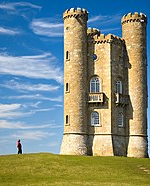

In [6]:
show_pnm('./broadcast_tower_host.pnm')

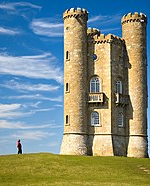

In [8]:
show_pnm('./broadcast_tower_device.pnm')

# VI/ Nhìn lại quá trình làm đồ án

| Sinh Viên | Khó khăn | Kiến thức đã học |
|:-------|:-------|:------:|
|  Nguyễn Hiếu Nghĩa  |  - Đọc hiểu tài liệu tiếng anh và nghe các video hướng dẫn tiếng anh còn khó khăn. Thời gian làm đồ án chỉ buổi tối và cuối tuần  |  Hiểu hơn về cách chạy song song và cách làm việc nhóm cũng như quản lý thời gian.  |
|  Đinh Thành Phú  |  Khó khăn về dựng source, build source và hiểu thuật toán  |  - Quản lý sắp xếp thời gian cho nhóm và suy nghĩ logic với cách chạy song song (nhiều thread)  |
|  Phạn Thành Phát  |  - Thời gian hạn chế chỉ làm cuối tuần và buổi tối. - Khó khặn trong hiểu cách thuật tuấn chạy.  |  Quản lý thời gian và cách lập trình song song và sự khác nhau giữa song song và tuần tự như thế nào  |


#### Nhóm
Thuận lợi: 
  * Có nhiều tài liệu tham khảo (docmatation, video hướng dẫn)
  * Kiến thức lập trình song song trong quá trình học
  * Thời gian làm đồ án đủ để triển khai và hoàn thành dự án 

Khó khăn:
  * Tài liệu đa số là tiếng anh.
  * Tài liệu về giải pháp tối ưu hóa còn hạn chế
  * Thành viên trong nhóm có thời gian làm việc khác nhau
  * Code khó debug trên môi trường Colab

** Nếu có thêm thời gian nhóm sẽ hoàn thiện phần code cải tiến về cả tuần tự và song song tốt nhất và sửa structure source code.

# VII/ Tài liệu tham khảo

[Slides from teacher Phạm Trọng Nghĩa]("https://drive.google.com/drive/folders/19_KM-2h6aa5OE8wDsM6kk5THcPHfKLjS" "Drive")

[Wikipedia - Seam Carving]("https://en.wikipedia.org/wiki/Seam_carving" "wikipedia")

[Seam Carving - Week 2 - 18.S191 MIT Fall 2020  Grant Sanderson](https://www.youtube.com/watch?v=rpB6zQNsbQU)

[Seam Carving: Live Coding Session | Tuần 2 | MIT 18.S191 Mùa thu 2020 | James Schloss](https://www.youtube.com/watch?v=ALcohd1q3dk)

[Seam Carving Algorithm](https://vnoi.info/wiki/cs/imageprocessing/Seam-Carving.md)